In [564]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise sheet 2

## Task 1

In [565]:
def sin(x):
    return np.sin(x)


In [566]:
def f(pts, vals):
    """
    Calculate coefficients of Newton interpol by
    divided differences.

    input:
       pts ... list of points
       val ... list of values

    output:
       divided differences
    """

    n = len(pts)-1
    dd = np.asarray(vals)
    for i in range(n):
        for j in range(n, i, -1):
            if pts[j] == pts[j - i - 1]:
                dd[j] = np.cos(pts[j])
            else:
                # print ("i =",i, ", j =",j)
                dd[j] = (dd[j]-dd[j-1]) / (pts[j]-pts[j-i-1])
    return dd


Hermite: $p(x) := f(x_{0}) + \sum_{i = 1}^{n}f[x_{0}, ..., x_{i}] \prod_{j=0}^{i - 1}(x-x_{j})$

In [567]:
def hermite(pts_, val_, x):
    fs = f(pts_, val_) # divided differences
    sum_ = 0
    for i in range(1, len(pts_)):
        fi = fs[i]
        prod = 1
        for j in range(0, i):
            prod *= (x - pts_[j])
        sum_ += fi * prod
    return val_[0] + sum_

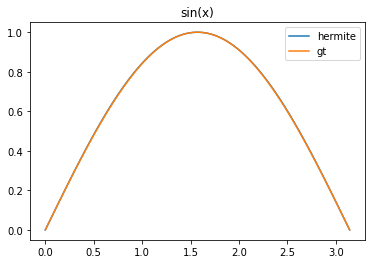

In [568]:
pts = np.array([0, 0, np.pi / 2, np.pi / 2, np.pi, np.pi])
val = sin(pts)

x = np.linspace(0, np.pi, 100)
y = hermite(pts, val, x)

plt.plot(x, y, label="hermite")

y = np.sin(x)
plt.plot(x, y, label="gt")

plt.title("sin(x)")
plt.legend()
plt.show()

implementation of the atkin neville scheme

In [569]:
def aitken_neville(x,vals,x_bar):
    n = len(x)-1
    for m in range(1,n):
        for j in range(0,n-m):
            vals[j] = ((x_bar-x[j])*vals[j+1] - (x_bar-x[j+m])*vals[j])/(x[j+m]-x[j])
    return vals[0]

$D$ approximates the derivative of a function.

In [570]:
def D(x_, h):
    # print(np.around(pts, 2))
    # print(np.around(np.sin(pts), 2))
    return (hermite(pts, np.sin(pts), x_ + h) - hermite(pts, np.sin(pts), x_)) / h

Compute the error between the approximated derivative and the real derivative. Since we can not compute
the derivative $D$ of $f$ (division by $h = 0$), we use small values of $h$ and approximate the derivative using the atkin neville scheme.
Then we can extrapolate the derivative by looking at $h = 0$.

In [571]:
def derivative(q_, x_):
    h = [q_**i for i in range(0,20)]
    ds = [D(x_,i) for i in h] # compute interpolation y values
    res = aitken_neville(h, ds, 0) # extrapolate at position 0
    print("hermite: ", round(x_, 2), "->",  round(res, 2))
    print("gt:      ", round(x_, 2), "->",  round(np.cos(x), 2))

Now we need to test whether $f'(x_{i}) = p'(x_{i})$

In [572]:
x = 0
q = 0.5
derivative(q, x)

x = np.pi / 2
derivative(q, x)

x = np.pi
derivative(q, x)

hermite:  0 -> 1.0
gt:       0 -> 1.0
hermite:  1.57 -> 0.0
gt:       1.57 -> 0.0
hermite:  3.14 -> -1.0
gt:       3.14 -> -1.0


and $f(x_{i}) = p(x_{i})$

In [573]:
x = 0
y = hermite(pts,np.sin(pts), x)
print("hermite: ", round(x, 2), "->", round(y, 2))

y = np.sin(x)
print("gt     : ", round(x, 2), "->", round(y, 2))


x = np.pi / 2
y = hermite(pts,np.sin(pts), x)
print("hermite: ", round(x, 2), "->", round(y, 2))

y = np.sin(x)
print("gt     : ", round(x, 2), "->", round(y, 2))


x = np.pi
y = hermite(pts,np.sin(pts), x)
print("hermite: ", round(x, 2), "->", round(y, 2))

y = np.sin(x)
print("gt     : ", round(x, 2), "->", round(y, 2))

hermite:  0 -> 0.0
gt     :  0 -> 0.0
hermite:  1.57 -> 1.0
gt     :  1.57 -> 1.0
hermite:  3.14 -> 0.0
gt     :  3.14 -> 0.0


## Task 2

In [574]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

In [575]:
def f1(x): return np.sqrt(x)
def f2(x): return np.arctan(10 * x)

def cebyshev(x, low, up):
    d = low + up
    if (d > 0.01):
        return d/2 * np.cos((x+0.5)*np.pi/len(x)) + d/2
    else:
        return np.cos((x+0.5)*np.pi/len(x))

def convergence_plot(fun, lower_bound, upper_bound):
    min_points = 5
    max_points = 18

    err_splines_uniform = []
    err_lagrange_uniform = []

    err_splines_x3 = []
    err_lagrange_chebyshev = []

    for i in range(min_points, max_points):

        x = np.linspace(lower_bound, upper_bound, i)
        y = fun(x)

        # compute lagrange interpolation
        poly = interpolate.lagrange(x, y)

        # compute spline interpolation
        tck = interpolate.splrep(x, y)

        x_test = np.linspace(lower_bound, upper_bound, 1000)
        y_test = fun(x_test)
        y_spline_interpolation = interpolate.splev(x_test, tck)
        y_lagrange_interpolation = poly(x_test)

        spline_error = max(abs(y_test - y_spline_interpolation))
        lagrange_error = max(abs(y_test - y_lagrange_interpolation))

        err_splines_uniform.append(spline_error)
        err_lagrange_uniform.append(lagrange_error)

    plt.plot(np.linspace(min_points, max_points, max_points - min_points), err_splines_uniform, label="uniform splines")
    plt.plot(np.linspace(5, 18, 13), err_lagrange_uniform, label="uniform lagrange")

    for i in range(min_points, max_points):

        x_cheb = cebyshev(np.linspace(0, i, i), lower_bound, upper_bound)
        y_cheb = fun(x_cheb)

        x_pow3 = np.linspace(lower_bound, upper_bound, i) ** 3
        y_pow3 = fun(x_pow3)

        # compute lagrange interpolation
        poly = interpolate.lagrange(x_cheb, y_cheb)

        # compute spline interpolation
        tck = interpolate.splrep(x_pow3, y_pow3)

        x_test = np.linspace(lower_bound, upper_bound, 1000)
        y_test = fun(x_test)
        y_spline_interpolation = interpolate.splev(x_test, tck)
        y_lagrange_interpolation = poly(x_test)

        spline_error = max(abs(y_test - y_spline_interpolation))
        lagrange_error = max(abs(y_test - y_lagrange_interpolation))

        err_splines_x3.append(spline_error)
        err_lagrange_chebyshev.append(lagrange_error)

    plt.plot(np.linspace(min_points, max_points, max_points - min_points), err_splines_x3, label="x3 splines")
    plt.plot(np.linspace(min_points, max_points, max_points - min_points), err_lagrange_chebyshev, label="cheby lagrange")

    plt.yscale('symlog')
    plt.ylabel("max error")
    plt.xlabel("# interpolation points")
    plt.legend()
    plt.show()

convergence plot for $f(x) = \sqrt{x}$

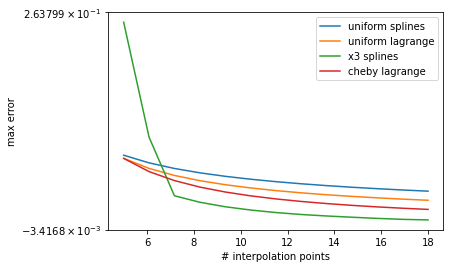

In [576]:
convergence_plot(f1, 0, 1)

convergence plot for $f(x) = arctan(10x)$

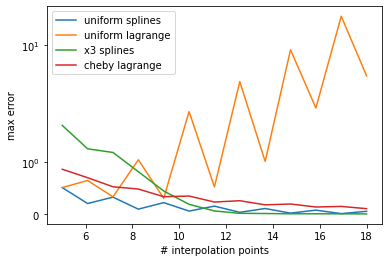

In [577]:
convergence_plot(f2, -1, 1)


## Task 7

In [578]:
def f7(x):
    sum = 0
    for j in range(1, int(1/x) + 1):
        sum += (6 / j**2)
    return sum

In [579]:
y = []
x = []
for i in range(20, 1, - 1):
    xi = 2**(-i)
    x.append(xi)
    y.append(f7(xi))

x = np.asarray(x)
y = np.asarray(y)

tck = interpolate.splrep(x, y)
print("Result: ", interpolate.splev(0, tck))

Result:  9.869604401089193
